# Klimamodell mit Wärmespeicher (Ozean)

In diesem Notebook ist die soeben besprochene Methode zur Lösung des Modells mit einem Wärmespeicher wie einem Ozean implementiert. 

Zur Erinnerung: das Modell wird durch diese Gleichung beschrieben:

$$\frac{\Delta T}{\Delta t} =  \frac{1}{C}\cdot\left(\frac{1}{4}(1-\alpha)S - \tau\sigma T^4\right)$$


Zunächst müssen wir dafür einige grundlegende Konstanten definieren. Genauere Informationen zum Code findest du immer in den Kommentaren, die mit # beginnen.

In [25]:
import numpy as np
import matplotlib.pyplot as plt

c = 4190                    # spezifische Wärmekapazität von Wasser in J/kg/K
rho = 1000                  # Dichte von Wasser in kg / m**3
alpha = 0.3003              # Albedo der Erde
S = 1361                    # Solarkonstante in W/m**2
tau = 0.61                  # Transmissionsgrad der Erde
sigma = 5.67 * 10**(-8)     # Stefan-Boltzmann-Konstante in W/m**2/K**4

In der Gleichung des Modells und während der Lösung kommen zudem noch einige weitere Parameter vor, die du anpassen kannst:

In [52]:
h = 100                      # Tiefe des klimarelevanten Teil des Ozeans in m
C = 0.7 * c * rho * h        # Wärmekapazität des Ozeans pro Fläche in J/K/m**2
T0 = 285                     # Anfangstemperatur in Kelvin

dt = 3600 * 24 * 30          # Zeitschritt von 1 Monat in s
N = 5000                     # Zahl der Schritte

Jetzt sind wir bereit die erarbeitete Methode, das Euler-Verfahren, zu verwenden.

$$
T_{n+1}
= T_n
+ \frac{1}{C}\cdot\left(
\frac{1}{4}(1-\alpha)S
- \tau\sigma T^4
\right)\cdot \Delta t
$$

In [53]:
def f(T):
    """Diese Funktion gibt dir die rechte Seite der Gleichung, die das Modell beschreibt"""
    return 1/C * (1/4 * (1-alpha) * S - tau * sigma * T**4)

temperatures = [T0]

# eigentliches Euler-Verfahren, indem die Formel immer wieder angewendet wird
T=T0
for n in range(N + 1):
    T = T + dt * f(T)
    temperatures.append(T)

Jetzt können wir das Ergebnis noch plotten:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


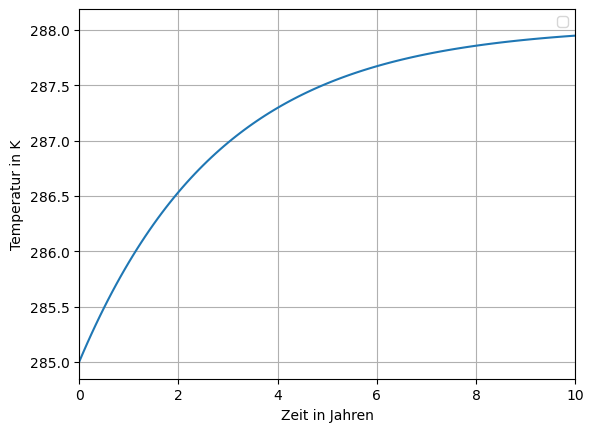

In [ ]:
x = np.linspace(0, N+1, N+2)
x_norm = x * dt / (3600 * 24 * 30 * 12)
tmax_plot = 10                          # Gib hier den ein, für welche Dauer du das Ergebnis sehen willst (= Maximum der x-Achse in Jahren)

plt.plot(x_norm, temperatures)
plt.xlabel("Zeit in Jahren")
plt.ylabel("Temperatur in K")
plt.xlim([0, tmax_plot])
plt.legend()
plt.grid()
